### <u>Student Details</u>

### Name: Garret Molloy

### ID: 9021906

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

Sample code to plot SVM margin, 'gutters' and support vectors

In [2]:
def plot_svm_hyperplane(clf, X, y, title=""):
    plt.scatter(X['0'], X['1'], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    plt.title(title)
    
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

In [3]:
def build_train_model(X_train, X_test, y_train, y_test, c=1, kernel='linear', g='auto'):
    model = svm.SVC(kernel='linear', gamma=g, C=c)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    support_vectors = len(model.support_vectors_)
    return model, score, support_vectors

## Task 4

Perform classification on dataset_1 using an __SVM__ with __linear kernel__ and experiment with the __C-parameter__ to find the widest margin solution with a hard margin and a soft margin. 

In [4]:
import pandas as pd

df1 = pd.read_csv("./dataset_1.csv")

In [5]:
df1[['0','1']].describe()

,0,1
count,10001.000000,10001.000000
mean,0.082508,-0.004040
std,0.615153,0.575639
min,-0.999635,-1.400000
25%,-0.496767,-0.496319
50%,0.208210,-0.006960
75%,0.614940,0.491170
max,0.999983,0.999918


In [6]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

X = df1[['0','1']]
y = df1['2']
y = y.astype(int)

y.value_counts()

1    6683
0    3318
Name: 2, dtype: int64

In [7]:
# pepare independent stratified data sets for training and test of the final model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y)

In [8]:
model, score, support_vectors = build_train_model(X_train, X_test, y_train, y_test)

title = ('SVC Accuracy: %3.5f Support Vectors = %d' % (score, support_vectors))
print(title)

SVC Accuracy: 0.99950 Support Vectors = 21


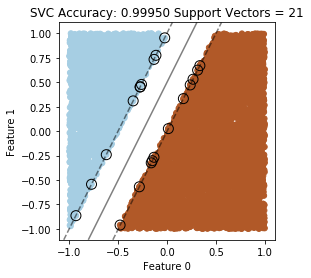

In [9]:
plot_svm_hyperplane(model, X_train, y_train, title)

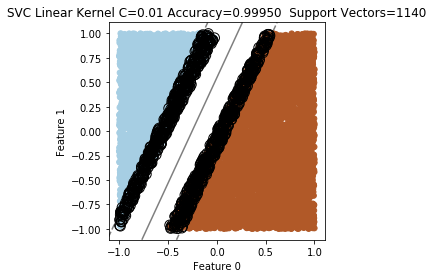

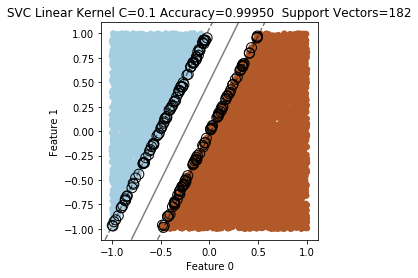

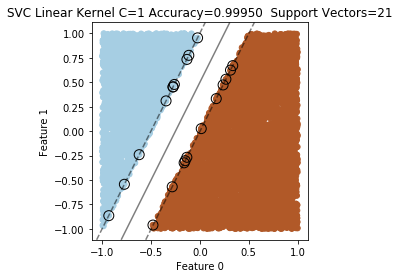

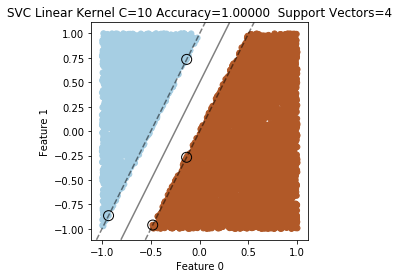

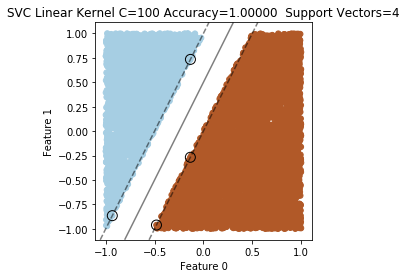

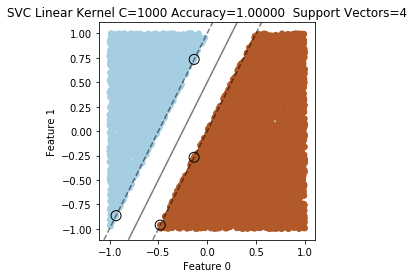

In [10]:

C = [0.01, 0.1, 1, 10, 100, 1000]

all_support_vectors = []

colors = np.array(["red", "blue"])


for c_value in C:
    model, score, support_vectors = build_train_model(X_train, X_test, y_train, y_test, c=c_value)
    all_support_vectors.append(support_vectors)
    title = ("SVC Linear Kernel C=%s Accuracy=%3.5f  Support Vectors=%d" %
        (str(c_value), score, support_vectors))
    plot_svm_hyperplane(model, X_train, y_train, title)
    plt.show()



Large C is a hard margin, so no tolerance for incorrect predicitons and it moves the line to maximize the margin for the outlier. In the final grpah where c=1000 we can see that the selected hyperplane maximizes the margin for the outlier sample rather than the majority.

For small C it is a soft margin with more tolerance, less overfitting and it maximizes the margin for the majority of the data and has no margin for the outlier, which is more intuitively correct if there is some outliers but we can see the bulk having the larger margin.

C=1 is a good value for this dataset.

We can see the number of support vectors reduce as the margin becomes harder and C larger, beinging limited to 3.


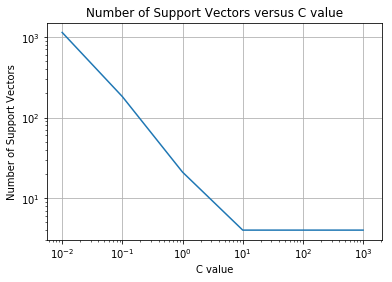

In [11]:
plt.plot(C, all_support_vectors)

# Thanks to Michel Danjou for Log function of X & Y axes for graph
ax = plt.gca()
ax.semilogx(1000, np.exp(-1000))
ax.semilogy(np.amax(all_support_vectors), np.exp(-np.amax(all_support_vectors)))
plt.ylabel('Number of Support Vectors')
plt.xlabel('C value')
plt.title('Number of Support Vectors versus C value')
ax.grid()
plt.show()

<hr/>

## Task 5

Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using __Support Vector Machines__ and choose suitable:
- __kernels__ &
- __hyper-parameters__

In [35]:
df1 = pd.read_csv("./dataset_1.csv")
df1.head(5)

Dataset 1


,Unnamed: 0,0,1,2
0,0,-0.331982,-0.926029,1.0
1,1,-0.819310,-0.242368,0.0
2,2,0.922427,0.499088,1.0
3,3,-0.570793,0.562286,0.0
4,4,0.375817,-0.941165,1.0


In [13]:
df2 = pd.read_csv("./dataset_2.csv")
df2.head(5)

,Unnamed: 0,0,1,2
0,0,0.799315,0.219275,0.0
1,1,-0.731615,-0.403627,1.0
2,2,0.424460,0.138607,0.0
3,3,0.586654,-0.187708,0.0
4,4,0.832493,0.241860,0.0


In [14]:
df3 = pd.read_csv("./dataset_3.csv")
df3.head(5)

,Unnamed: 0,0,1,2
0,0,-0.532786,0.661453,1.0
1,1,-0.500866,0.695587,1.0
2,2,-0.697046,-0.116419,1.0
3,3,0.557011,0.332436,1.0
4,4,-0.012738,0.858232,1.0


All 3 datasets of similar composition - so I will use Feature 2 for the target in all cases.

In [15]:
df1['2'].value_counts()

1.0    6683
0.0    3318
Name: 2, dtype: int64

In [16]:
df2['2'].value_counts()

0.0    6672
1.0    3328
Name: 2, dtype: int64

In [17]:
df3['2'].value_counts()

1.0    8824
0.0    1176
Name: 2, dtype: int64

Target classificaiton is split is one third for Class 0 and two thirds for Class 1 - for dataset 1 and 2.

Dataset 3 has a smaller presence of Class 0, one tenth of the samples, 88.25% is Class 1.

This imbalanced classificaiton can be managed by ensuring we stratify the train test split to ensure a proportional representaiton of the classes in both the train and test split.

I will not plot just yet to avoid snooping!!
                                       
Instead I will create a Support Vector Machine with different kernels and Hyper Parameters and test these on the datasets to determine the best values.

In [73]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(float(x_min), float(x_max), h),
                         np.arange(float(y_min), float(y_max), h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, colors=['#B6F2FF','#FFB6FE','#CBFFB6'], **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z,  **params)
    return out

def test_models(data, models, titles):
    # First the data must be sploit into predictors & target
    X = data[['0','1']]
    y = data['2']
    y = y.astype(int)
    best_score = 0
    
    # Data is split into Train and Test sets
    # pepare independent stratified data sets for training and test of the final model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y)
    
    # We train our models (different hyper parameters and kernels) on the train data
    models = (clf.fit(X_train, y_train) for clf in models)
        
    # We evaluate the models on test data
    
    plots = len(list(titles))
    rows = int((plots/2)+(plots%2))
    
    fig, sub = plt.subplots(rows, 2, figsize=(15,rows * 5))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X_train[['0']], X_train[['1']]
    xx, yy = make_meshgrid(X0, X1)
    y = y_train


    for clf, title, ax in zip(models, titles, sub.flatten()):
        
        colors = np.array(["pink", "blue"])
        if 'RBF' in title:
            colors = np.array(["yellow", "green"])
        elif 'poly' in title:
            colors = np.array(["orange", "magenta"])
            
        plot_contours(ax, clf, xx, yy,
                       alpha=0.8)
        ax.scatter(X0, X1, c=colors[y], s=20, edgecolors='k', alpha=.5)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        score = clf.score(X_test, y_test)
        support_vectors = len(clf.support_vectors_)
        ax.set_title(title + ' Accuracy: ' + str(score) + " Support Vectors =" + str(support_vectors))
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='r')
        if(score>best_score):
            best_score=score
            best_title=title
            best_vectors=support_vectors
        score = round(score, 3)
        ax.set_title(title + '\nAccuracy: ' + str(score) + " with " + str(support_vectors) + " support vectors")

    plt.show()
    print("** Score:", best_score," Best Model was:", best_title, "with", best_vectors, "support vectors")
    

### Models 2

A set of 3 SVC kernels:
- linear
- RBF
- Poly.

Each with a variation of Hyper Parameter C = {0,01, 0.1, 1, 100}

I'll use these C variables on all 3 datasets to see which ones look best before further tweaking the Hyper parameters.

In [74]:
models2 = (svm.SVC(kernel='linear', C=0.01),
          svm.SVC(kernel='linear', C=0.1),
          svm.SVC(kernel='linear', C=1),
          svm.SVC(kernel='linear', C=100),
          svm.SVC(kernel='rbf', gamma='auto', C=0.01), 
           svm.SVC(kernel='rbf', gamma='auto', C=0.1),
          svm.SVC(kernel='rbf', gamma='auto', C=1),
          svm.SVC(kernel='rbf', gamma='auto', C=100),
          svm.SVC(kernel='poly', gamma='auto', C=0.01),
           svm.SVC(kernel='poly', gamma='auto', C=0.1),
          svm.SVC(kernel='poly', gamma='auto', C=1),
          svm.SVC(kernel='poly', gamma='auto', C=100))

# title for the plots
titles2 = (
          'SVC with linear kernel C=0.01',
          'SVC with linear kernel C=0.1',
          'SVC with linear kernel C=1',
          'SVC with linear kernel C=100',
          'SVC with RBF kernel C=0.01',
          'SVC with RBF kernel C=0.1',
          'SVC with RBF kernel C=1',
          'SVC with RBF kernel C=100',
          'SVC with poly kernel C=0.01',
          'SVC with poly kernel C=0.1',
          'SVC with poly kernel C=1',
          'SVC with poly kernel C=100')

## <u> Dataset 1 Classifier Evaluation using 3 Kernels and Various C Values</u>

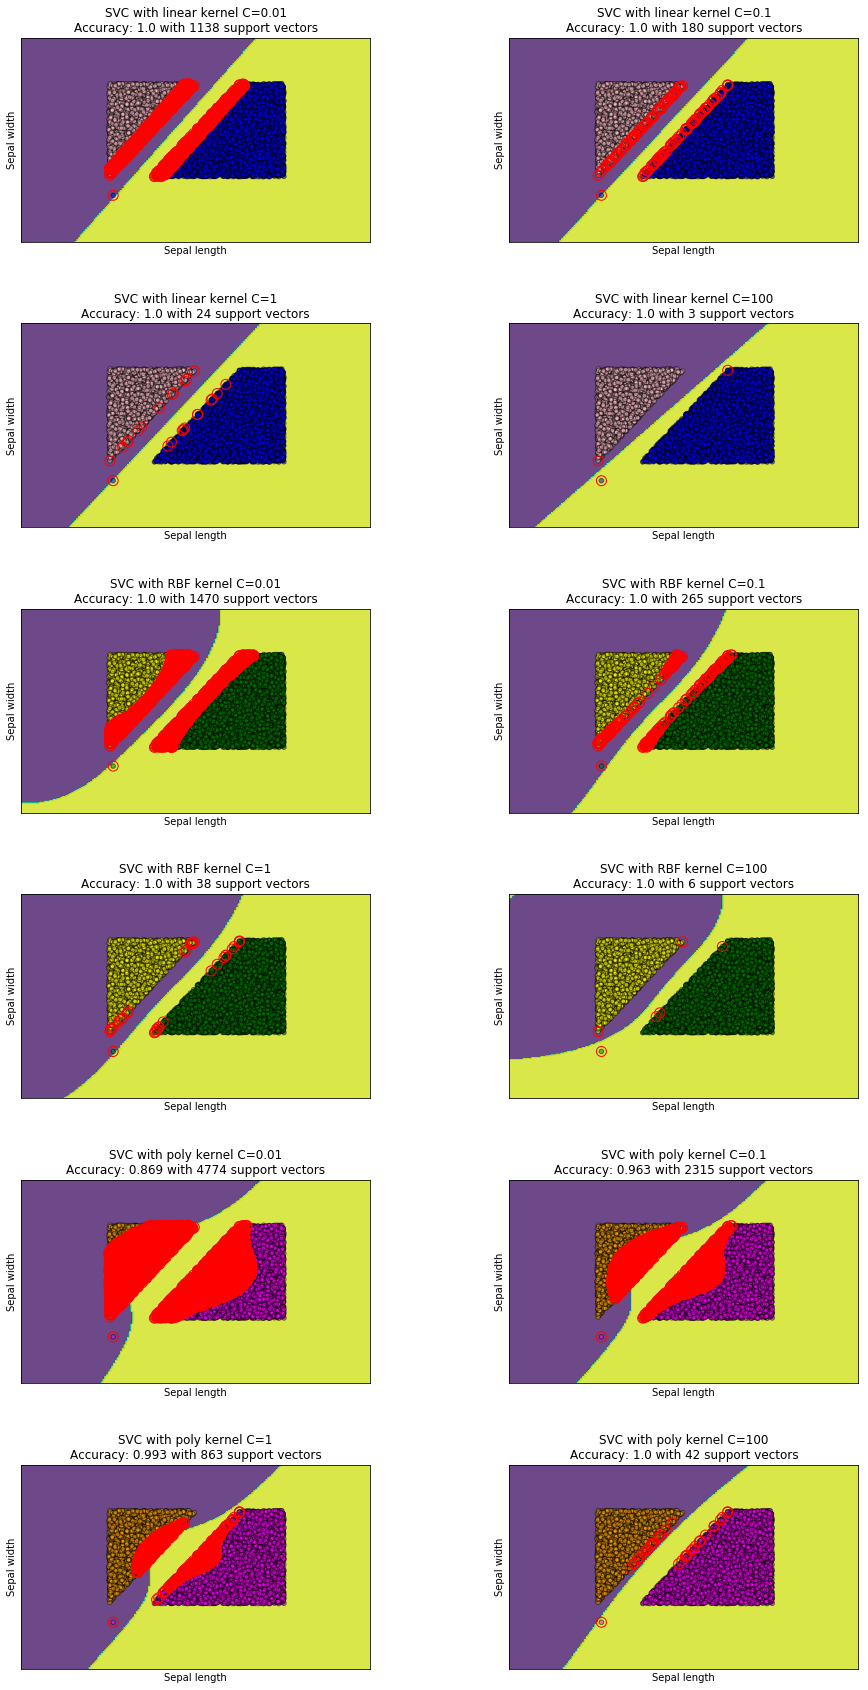

** Score: 1.0  Best Model was: SVC with linear kernel C=0.01 with 1138 support vectors


In [75]:
test_models(df1, models2, titles2)

## Review Dataset1 Results

### Liner Kernel

We can see that the linear model is appropriate for this dataet intuitively and there is a linear separation with a decent separation except for the outlier.

#### C-Vlaue for Linear

We see that a small C Value allows for a wider margin for the majority of the data and is more forgiving of the outlier and does not overly depend on this sample when determining the hyperplane.

### RBF Kernel

Using the RBF kernel we see the ability to have more complex boundaries, which may be overkill in this dataset. 

#### C-Vlaue for RBF

Varying only the __C__ value we see more infelxion on the boundary created by the model.

### Poly Kernel

We can see that with the poly kernel that we have more complex hyperplanes, hich do not improe the separation infact our accuracy goes down. Only with C=100 or a large C we force the hard separation and we resolve the inflection of the hyperplane into to reduce the incorrect classifications.


#### C-Vlaue for Linear

We see that a small C Value allows for a softer margin and with the complex boundaries it creates more incorrect sampling, only with a large C do we force the boundary away from the incorrect classificaiton.



## <u> Dataset 2 Classifier Evaluation using 3 Kernels and Various C Values</u>

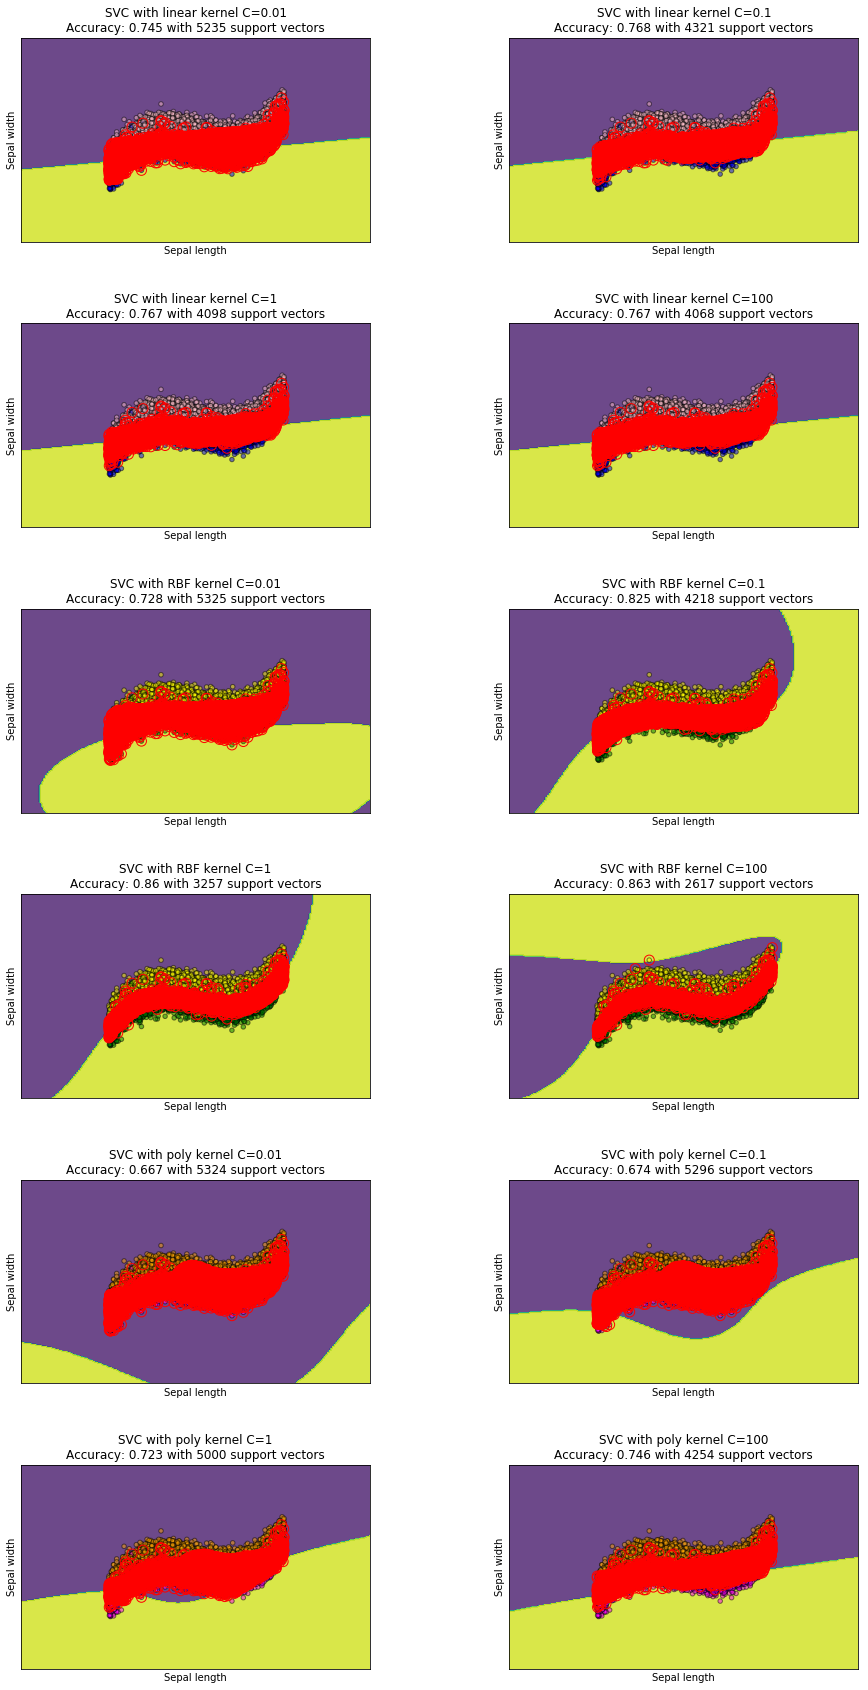

** Score: 0.863  Best Model was: SVC with RBF kernel C=100 with 2617 support vectors


In [76]:
test_models(df2, models2, titles2)

## Review Dataset2 Results

### Liner Kernel

WLooking  the data, we can intuitively see that a linear model wil have limited sucess. That we will need a polynomial or RBF model

#### C-Vlaue for Linear

The alrger C prvides a harder margin and the bet result for this simple model.

### RBF Kernel

Using the RBF kernel we see the ability to have more complex boundaries, which we can see suit this dataset. 

#### C-Vlaue for RBF

Varying only the __C__ value we induce the corerect inflection for C=1, lower than that and we do not follow the curve enough. Higher and we overdo the complexity and overfit.


### Poly Kernel

Though the poly kernel can produce a more complex hyperplanes, when varying only C - we do not see a great correlatin as it struggles to match the curve of the data. 


#### C-Vlaue for Linear

We see that a larger C forces the model to conform better to the data, but the accuracy is still not great and is best at C=100.


## <u> Dataset 3 Classifier Evaluation using 3 Kernels and Various C Values</u>

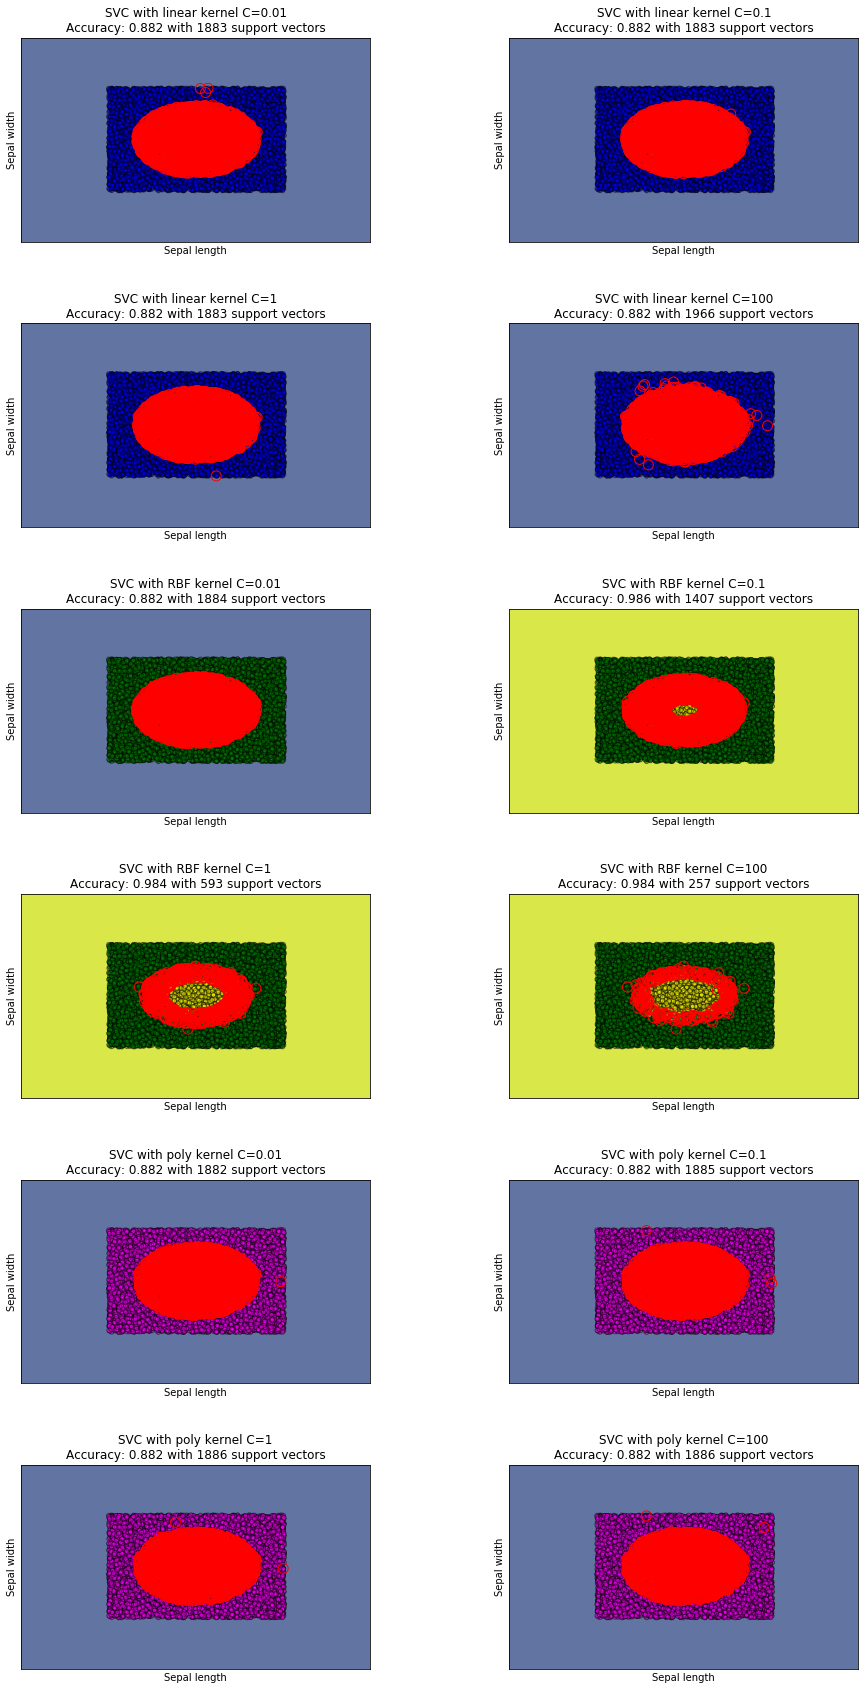

** Score: 0.9855  Best Model was: SVC with RBF kernel C=0.1 with 1407 support vectors


In [77]:
test_models(df3, models2, titles2)

## Review Dataset3 Results

We must note that for this dataset that there are 88% for one class - so a model that simplty say all values are this class will be 88% accurate. This is imprtant as we need to see a significant imprvement on this value. We could add additional smaples to balance the data to rectift this for our accuracy scores.


### Liner Kernel

We can see that the linear model is not appropriate for this dataet  as it is clearly not linearly separable. The best a single line could do is correctly classify half the center data (5% of the 11%) so a target of 93% is achieveable without much accuracy (88% are 1's plus the 5%). In fact espite4varying C - the SVC linear kernel model does not even attempt to do this separation and we do not imporve onthe default unclassified model of 88%.

#### C-Vlaue for Linear

Varying C does not seem to help this model.

### RBF Kernel

Using the RBF kernel we see the ability to adapt the hyperplane boundary to match the data pattern with the correct C variable.
 

#### C-Vlaue for RBF

A small C (0.01) does not help us but C>0.1 allows us to match the data pattern of a centre circle ad achieve 98.5% accuracy.

### Poly Kernel

Despte varying C the Poly kernael model cannot match the data pattern and achieves zero improvement on the unclassified model 88% so it cannot match at all.

#### C-Vlaue for Linear

This time variations in C do not help to imporve the model.

# Further Hyper Parameter Tuning

Dataset 1 seems to have a suitable kernal and C paramter that is well suited to the data profile.

We want the optimum hyper-parameters for Dataset 2 and dataset 3.

The provisional results show RBF to be a good kernal for these datasets. We will now tune the __gamma__ hyperparameter to see if we can futher optimize the model.

### I will now vary Gamma for RBF and Poly Kernels for Dataset2 and Dataset 3 using the best C Values achieved from the first round of investigation.

I had to break the options into different sets as they would not complete as a unit.
The final mdel kernel=poly for Gamma =100 for dataset3 would not return for me.

In [78]:
models3 = (
          svm.SVC(kernel='rbf', gamma=0.1, C=0.1),
          svm.SVC(kernel='rbf', gamma=1, C=0.1),
          svm.SVC(kernel='rbf', gamma=10, C=0.1),
          svm.SVC(kernel='rbf', gamma=100, C=0.1),
    
          svm.SVC(kernel='rbf', gamma=0.1, C=1),
          svm.SVC(kernel='rbf', gamma=1, C=1),
          svm.SVC(kernel='rbf', gamma=10, C=1),
          svm.SVC(kernel='rbf', gamma=100, C=1),
    
          svm.SVC(kernel='rbf', gamma=0.1, C=100),
          svm.SVC(kernel='rbf', gamma=1, C=100),
          svm.SVC(kernel='rbf', gamma=10, C=100),
          svm.SVC(kernel='rbf', gamma=100, C=100),
   
#           svm.SVC(kernel='poly', gamma=0.1, C=0.1),-
#           svm.SVC(kernel='poly', gamma=1, C=0.1),
#           svm.SVC(kernel='poly', gamma=10, C=0.1),
#           svm.SVC(kernel='poly', gamma=100, C=0.1),
    
#           svm.SVC(kernel='poly', gamma=0.1, C=1),
#           svm.SVC(kernel='poly', gamma=1, C=1),
#           svm.SVC(kernel='poly', gamma=10, C=1),
#           svm.SVC(kernel='poly', gamma=100, C=1)
)

# title for the plots
titles3 = (
          'SVC with RBF kernel gamma=0.1, C=0.1',
          'SVC with RBF kernel gamma=1, C=0.1',
          'SVC with RBF kernel gamma=10, C=0.1',
          'SVC with RBF kernel gamma=100, C=0.1',
    
          'SVC with RBF kernel gamma=0.1, C=1',
          'SVC with RBF kernel gamma=1, C=1',
          'SVC with RBF kernel gamma=10, C=1',
          'SVC with RBF kernel gamma=100, C=1',
 
        'SVC with RBF kernel gamma=0.1, C=100',
          'SVC with RBF kernel gamma=1, C=100',
          'SVC with RBF kernel gamma=10, C=100',
          'SVC with RBF kernel gamma=100, C=100',
    
#           'SVC with poly kernel gamma=0.1, C=0.1',
#           'SVC with poly kernel gamma=1, C=0.1',
#           'SVC with poly kernel gamma=10, C=0.1',
#           'SVC with poly kernel gamma=100, C=0.1',
    
#           'SVC with poly kernel gamma=0.1, C=1',
#           'SVC with poly kernel gamma=1, C=1',
#           'SVC with poly kernel gamma=10, C=1',
#           'SVC with poly kernel gamma=100, C=1'
)

In [79]:
models4 = (
          svm.SVC(kernel='poly', gamma=0.1, C=0.1),
          svm.SVC(kernel='poly', gamma=1, C=0.1)
)

# title for the plots
titles4 = (
           'SVC with poly kernel gamma=0.1, C=0.1',
          'SVC with poly kernel gamma=1, C=0.1',
)

In [80]:
models5 = (
          svm.SVC(kernel='poly', gamma=10, C=0.1),
)

# title for the plots
titles5 = (
          'SVC with poly kernel gamma=10, C=0.1',
)

In [81]:
models6 = (
          svm.SVC(kernel='poly', gamma=20, C=0.1),
)

# title for the plots
titles6 = (
          'SVC with poly kernel gamma=20, C=0.1',
)

## RDF Kernel 
### with Gamma = {-0.1, 1, 10, 20} and set C to values with previously good results  C = {0.1, 1, 100}

## Dataset 2 RDF

Previous best for the RDF kernel for this dataset was 86.8% with C=1 or C=100 and default gamma

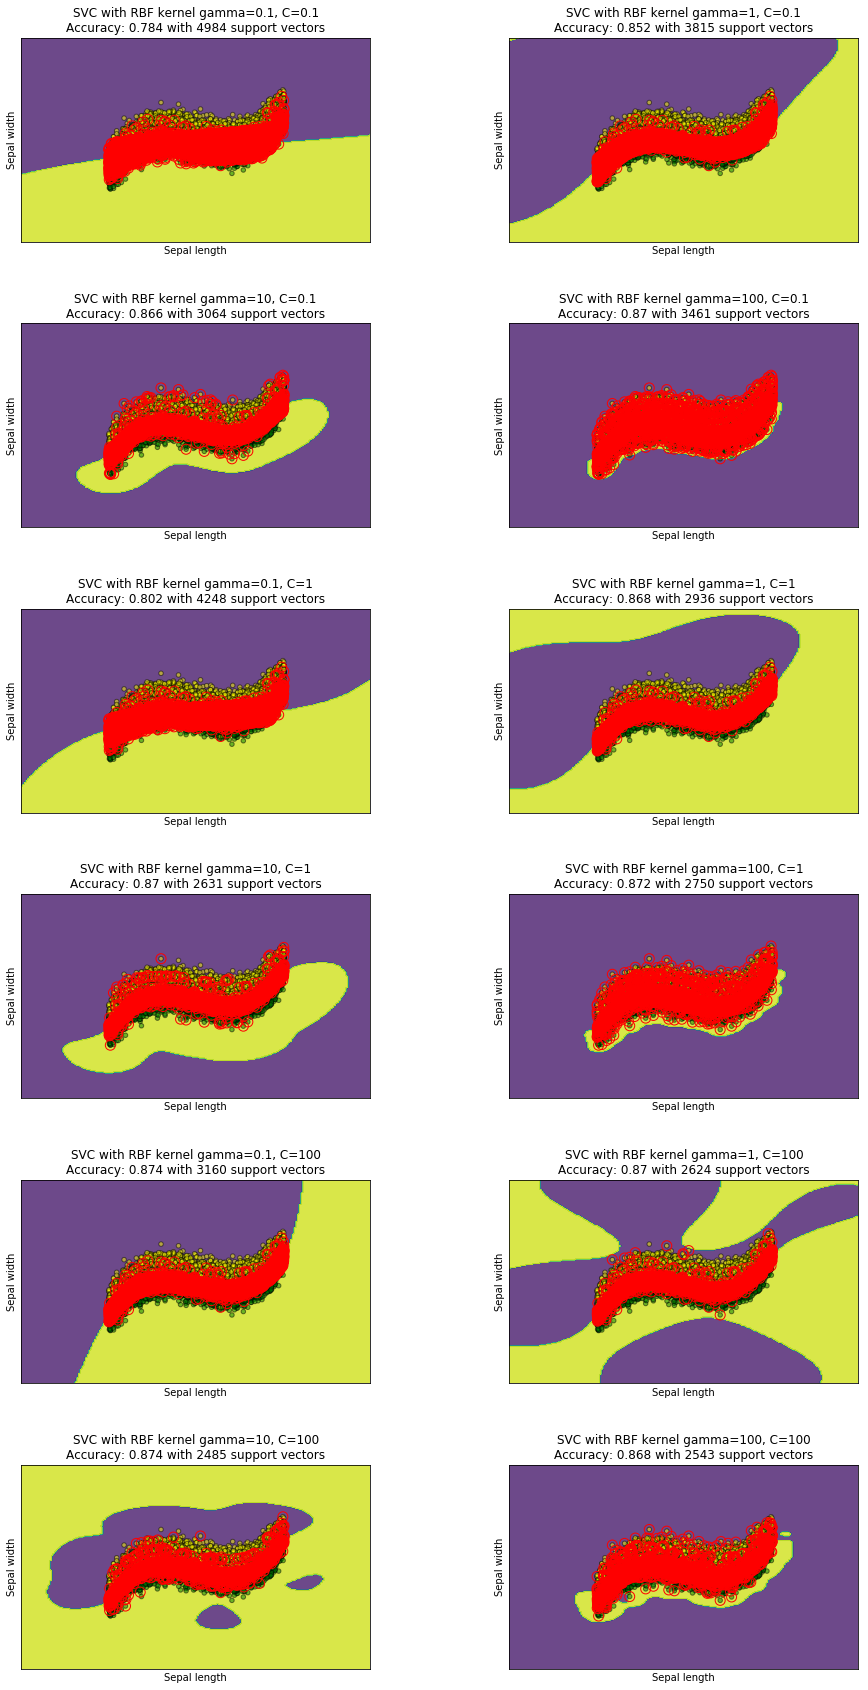

** Score: 0.874  Best Model was: SVC with RBF kernel gamma=0.1, C=100 with 3160 support vectors


In [82]:
test_models(df2, models3, titles3)        

No major imporvements on the default gamma

### Results Dataset2 RBF:

For Dataset2 & RBF alarge Gamma abd C=1 gives us th best accuracy with a slight onreae on the default accuracy.



## Dataset 3 RDF

Prevous best with RDF kernal and default gamma was 98.5%with C > 0.1  

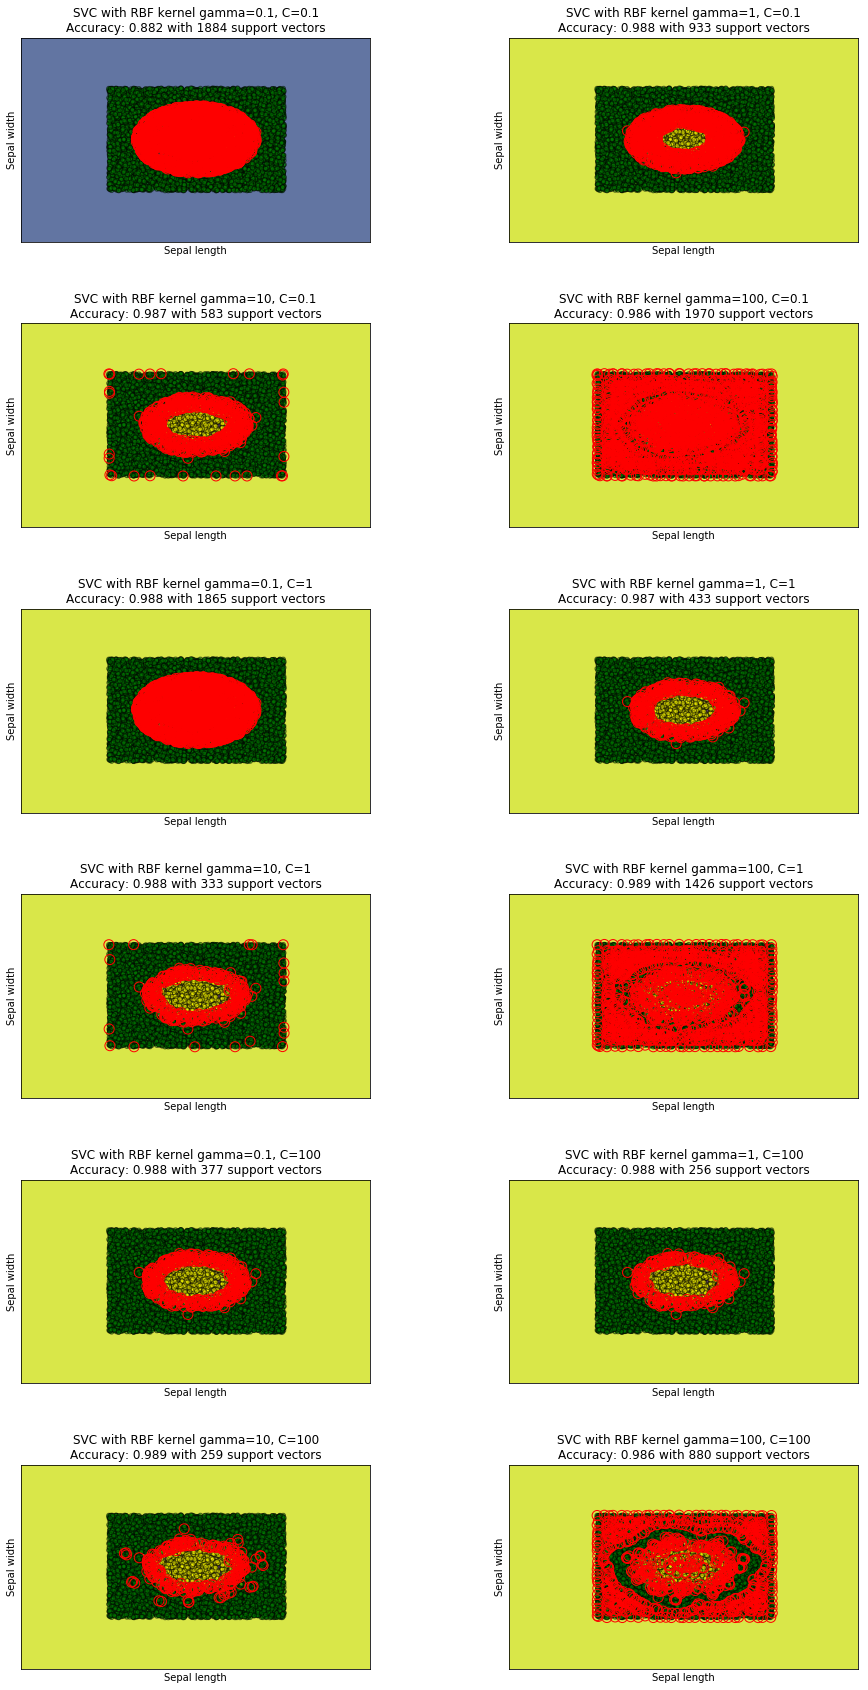

** Score: 0.989  Best Model was: SVC with RBF kernel gamma=100, C=1 with 1426 support vectors


In [83]:
test_models(df3, models3, titles3)

Excellent results with RBF kernel gamma=1 and C=0.1

### Poly Kernel with Gamma = {-0.1, 1, 10, 100} for C with previously good results  C = {0.1, 1, 100}

## Dataset 2 Poly

Previous best for the Poly kernel for this dataset was a __poor 76%__ with default gamma and varying C

This time we will vary gamma also

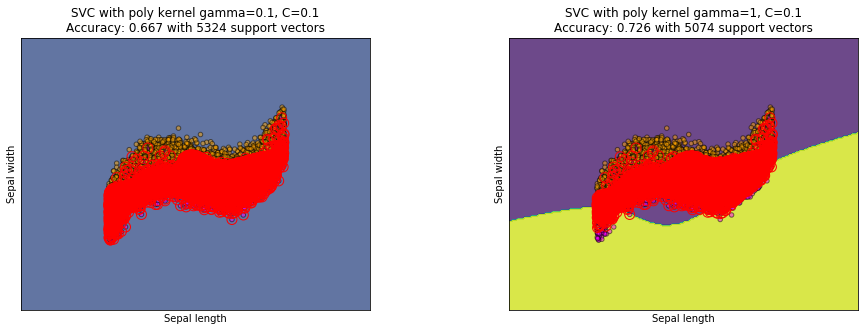

** Score: 0.7265  Best Model was: SVC with poly kernel gamma=1, C=0.1 with 5074 support vectors


In [84]:
test_models(df2, models4, titles4)        

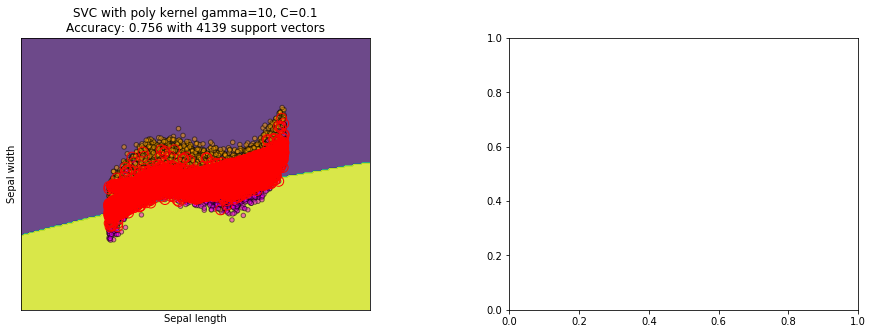

** Score: 0.756  Best Model was: SVC with poly kernel gamma=10, C=0.1 with 4139 support vectors


In [85]:
test_models(df2, models5, titles5)   

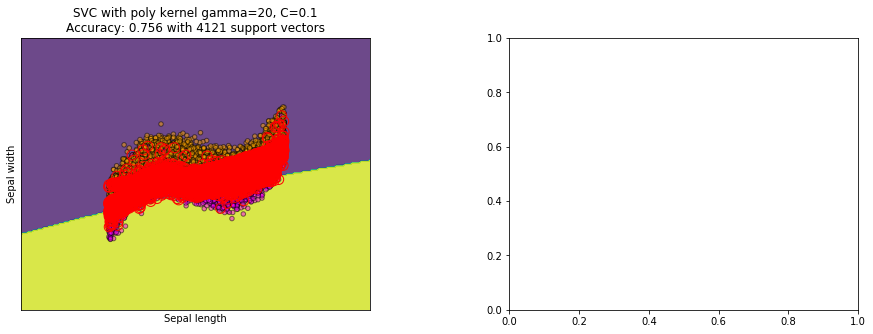

** Score: 0.756  Best Model was: SVC with poly kernel gamma=20, C=0.1 with 4121 support vectors


In [86]:
test_models(df2, models6, titles6)  

### Rsults Dataset2 Poly

We do not see improvements with modifyng gama ad C to be more accurate.


## Dataset 3 Poly

PRevious best for Ploy and this dataset was poor with no imporvement on no classifier.

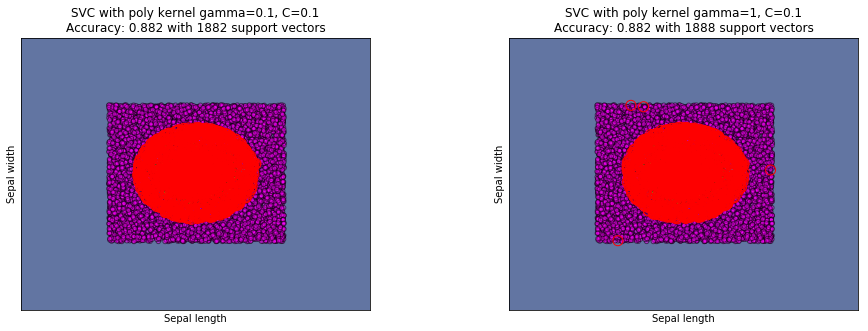

** Score: 0.8825  Best Model was: SVC with poly kernel gamma=0.1, C=0.1 with 1882 support vectors


In [87]:
test_models(df3, models4, titles4)        

### Dataset 3

Previous best for Poly Kernl and this dataset yielded no imorvement on the default data. This time we will vary gamma.

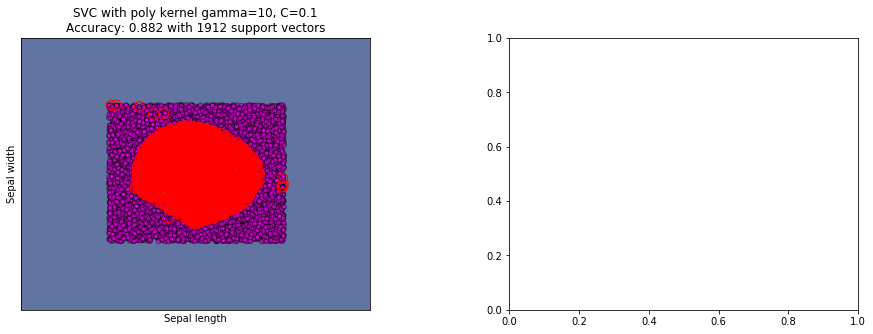

** Score: 0.8825  Best Model was: SVC with poly kernel gamma=10, C=0.1 with 1912 support vectors


In [88]:
test_models(df3, models5, titles5) 

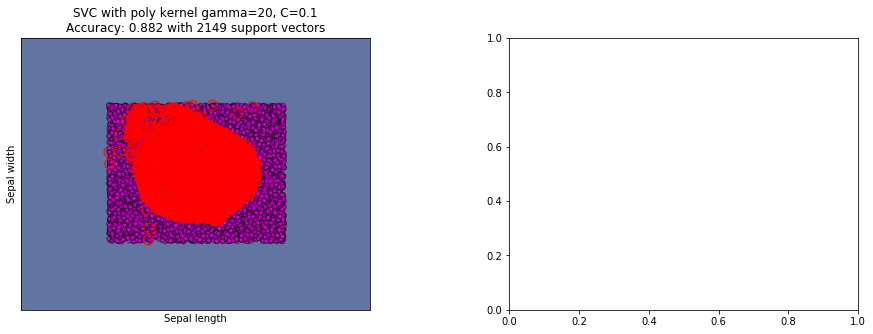

** Score: 0.8825  Best Model was: SVC with poly kernel gamma=20, C=0.1 with 2149 support vectors


In [89]:
# This model with poly kernel and gamma > 10 does not finish for me 
test_models(df3, models6, titles6) 

### Results Dataset3 Poly

We do not see any suitability for this kernel for the dataset and cannot get it to converge. A score of 88.25% if the same as saying all predictions will be 1, which will be right 88.25% of the time because of the distribution of the classes in the dataset. Which is no classifier at all, so this scpore is essentially 0.